In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [2]:
#from colors import *
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(25, 7), "xtick.bottom": True, "grid.linestyle": ":"})

In [3]:
PATH = "../data/finals_all_0106"

files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [4]:
file_data = []
diff_means = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}")
    try:
        mean = data_in.query("fw != -1 & diff > 0")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
    except:
        print(data_in, file)
    file_data.append(data_in)
    
data = pd.concat(file_data)

In [6]:
data_default = data[data['complexity'] == 'default']
data_default_fs = data_default[data_default['fullscreen'] == 'fullscreen']

(-10000.0, 40000.0)

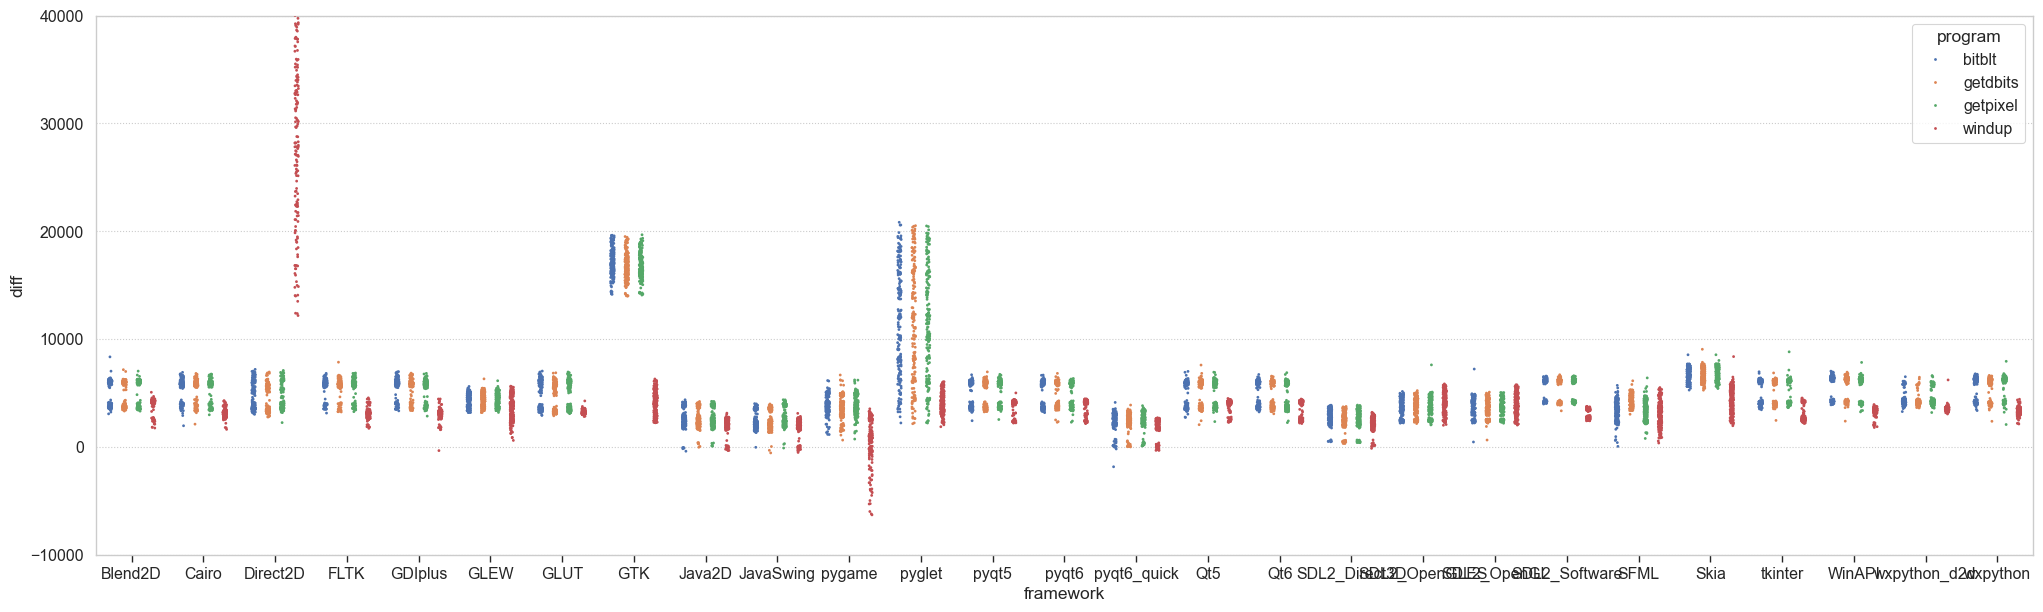

In [10]:
plot = sns.stripplot(data=data_default_fs[data_default_fs['program'] != 'none'], x='framework', y='diff', hue='program', dodge=True, size=2)
plot.axes.set_ylim(-10000, 40000)

(0.0, 30000.0)

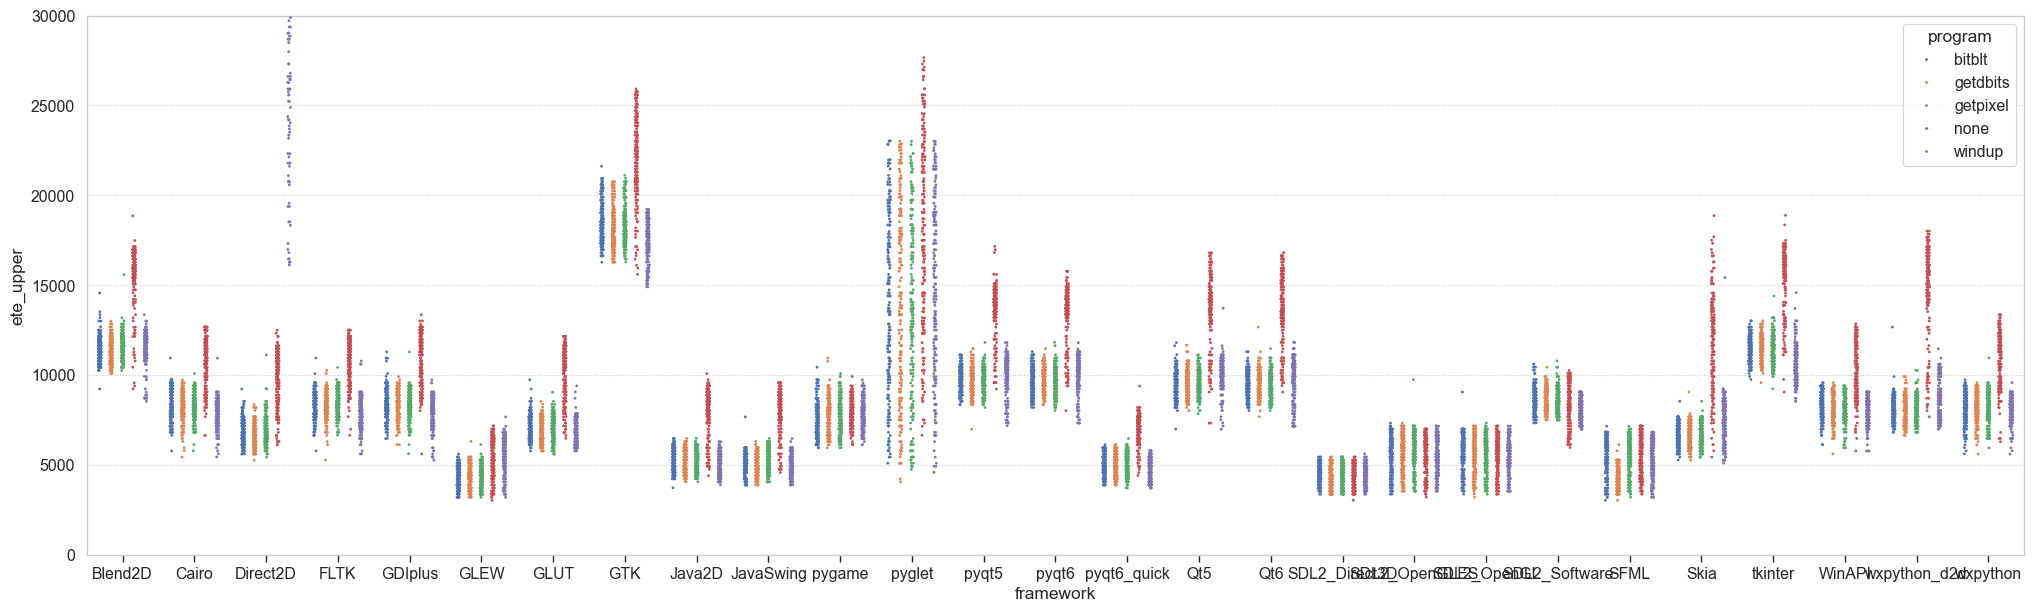

In [13]:
plot = sns.stripplot(data=data_default_fs, x='framework', y='ete_upper', hue='program', dodge=True, size=2)
plot.axes.set_ylim(0, 30000)
